In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp", "Age", "WorkWeekHrs"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Age,WorkWeekHrs
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN,NaN,50.0
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN,NaN,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN,25.0,40.0
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN,31.0,NaN


In [4]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Age,WorkWeekHrs
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0,36.0,39.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0,22.0,36.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0,23.0,40.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0,49.0,40.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0,53.0,36.0


In [5]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
Age             0
WorkWeekHrs     0
dtype: int64

In [6]:
df['Age'].value_counts()

30.0    1857
28.0    1838
25.0    1815
26.0    1750
27.0    1724
        ... 
23.8       1
32.5       1
84.0       1
26.8       1
75.0       1
Name: Age, Length: 79, dtype: int64

In [7]:
df["Age"].unique()

array([ 36. ,  22. ,  23. ,  49. ,  53. ,  27. ,  45. ,  25. ,  32. ,
        24. ,  31. ,  39. ,  34. ,  35. ,  38. ,  28. ,  44. ,  48. ,
        20. ,  26. ,  42. ,  21. ,  29. ,  30. ,  41. ,  37. ,  63. ,
        33. ,  43. ,  40. ,  51. ,  57. ,  60. ,  50. ,  59. ,  62. ,
        52. ,  46. ,  49.5,  56. ,  19. ,  54. ,  70. ,  47. ,  55. ,
        61. ,  18. ,  26.8,  64. ,  58. ,  65. ,  84. ,  73. ,  17. ,
        99. ,  68. ,  74. ,  69. ,  16. ,  85. ,  32.5,  66. ,  23.8,
        72. ,  67. ,  96. ,  79. , 279. ,  22.5,  15. ,   1. ,  98. ,
        78. ,  31.5,  39.5,  71. ,  81. ,  12. ,  75. ])

In [8]:
def clean_age(x):
    if x > 50:
        return 50
    if x < 25:
        return 25
    return float(x)

df['Age'] = df['Age'].apply(clean_age)

In [9]:
df= df[df['Age'] != 49.5]
df= df[df['Age'] != 26.8]
df= df[df['Age'] != 32.5]
df= df[df['Age'] != 31.5]
df= df[df['Age'] != 39.5]

In [10]:
df['Age'].value_counts()

25.0    6402
30.0    1857
28.0    1838
26.0    1750
27.0    1724
29.0    1678
50.0    1378
32.0    1376
31.0    1371
33.0    1184
35.0    1145
34.0    1062
36.0     880
38.0     835
37.0     818
39.0     677
40.0     667
42.0     462
41.0     457
43.0     385
45.0     324
44.0     293
48.0     249
46.0     246
47.0     219
49.0     209
Name: Age, dtype: int64

In [11]:
df['WorkWeekHrs'].value_counts()

40.0     14133
45.0      2665
50.0      1813
35.0      1585
38.0      1086
         ...  
46.5         1
475.0        1
61.0         1
35.5         1
93.0         1
Name: WorkWeekHrs, Length: 138, dtype: int64

In [12]:
def clean_workweekhrs(x):
    if x > 50:
        return 50
    if x < 35:
        return 35
    return float(x)

df['WorkWeekHrs'] = df['WorkWeekHrs'].apply(clean_workweekhrs)

In [13]:
df = df[df.groupby('WorkWeekHrs').WorkWeekHrs.transform('count')>10]

In [14]:
df['WorkWeekHrs'].value_counts()

40.0    14133
35.0     4468
50.0     3355
45.0     2665
38.0     1086
42.0      724
37.0      698
48.0      378
44.0      375
37.5      371
36.0      333
39.0      303
43.0      217
41.0      155
46.0       70
47.0       62
42.5       32
49.0       16
38.5       15
Name: WorkWeekHrs, dtype: int64

In [15]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info

<bound method DataFrame.info of               Country                                            EdLevel  \
7       United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9      United Kingdom    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
10     United Kingdom       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
11              Spain  Some college/university study without earning ...   
12        Netherlands  Secondary school (e.g. American high school, G...   
...               ...                                                ...   
62054          Canada                Associate degree (A.A., A.S., etc.)   
62212       Singapore       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
63402   United States  Some college/university study without earning ...   
63517          France                 Professional degree (JD, MD, etc.)   
63955       Mauritius    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

      YearsCodePro     Salary   Age  WorkWeekHrs  
7   

In [16]:
df['Country'].value_counts()

United States                       6635
United Kingdom                      2036
India                               1925
Germany                             1698
Canada                              1024
                                    ... 
Bahamas                                1
Democratic Republic of the Congo       1
Namibia                                1
Haiti                                  1
Yemen                                  1
Name: Country, Length: 146, dtype: int64

In [17]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [18]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 7322
United States         6635
United Kingdom        2036
India                 1925
Germany               1698
Canada                1024
France                 881
Brazil                 876
Spain                  593
Netherlands            586
Australia              568
Poland                 506
Italy                  499
Russian Federation     458
Sweden                 439
Name: Country, dtype: int64

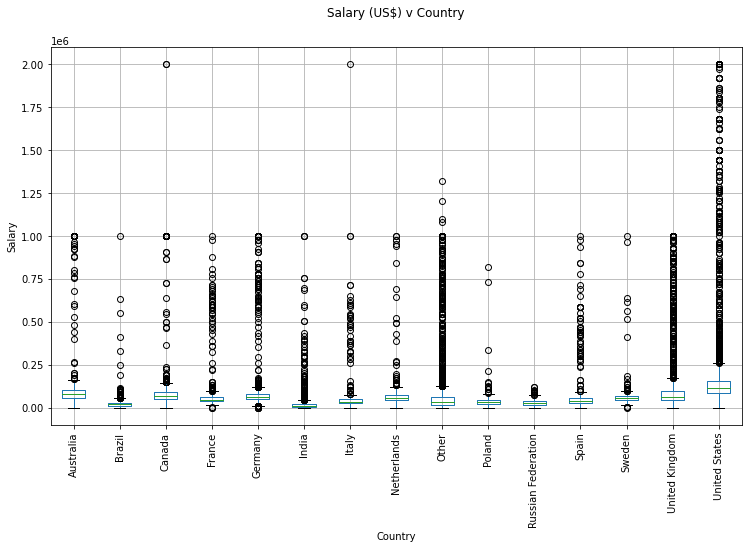

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [20]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != 'Other']

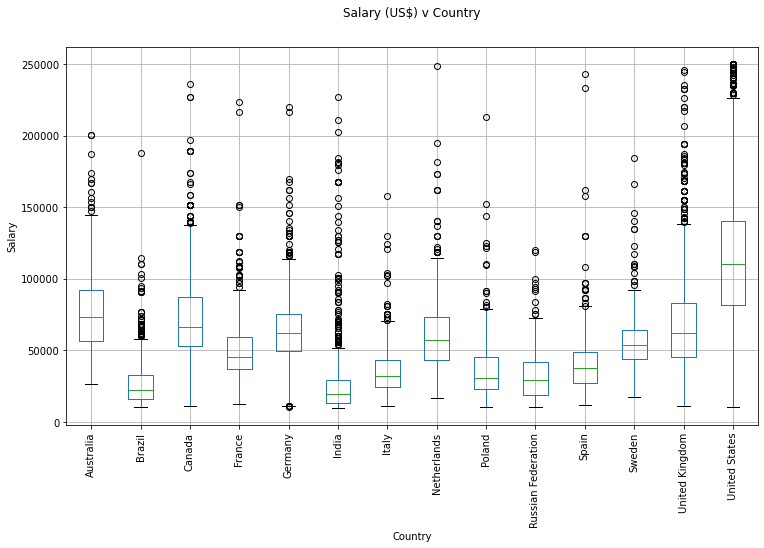

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [22]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '6', '28', '8',
       '23', '15', '25', '9', '11', 'Less than 1 year', '5', '16', '18',
       '14', '32', '19', '22', '38', '21', '30', '26', '27', '24', '17',
       '34', '35', '33', '36', '40', 'More than 50 years', '31', '37',
       '41', '45', '39', '42', '29', '43', '44', '50', '49'], dtype=object)

In [23]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [24]:
df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. ,  6. , 28. ,
        8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 16. , 18. , 14. ,
       32. , 19. , 22. , 38. , 21. , 30. , 26. , 27. , 24. , 17. , 34. ,
       35. , 33. , 36. , 40. , 50. , 31. , 37. , 41. , 45. , 39. , 42. ,
       29. , 43. , 44. , 49. ])

In [25]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [26]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [27]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [29]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [30]:
df.head()

,Country,EdLevel,YearsCodePro,Salary,Age,WorkWeekHrs
7,13,0,13.0,116000.0,36.0,39.0
9,12,2,4.0,32315.0,25.0,36.0
10,12,0,2.0,40070.0,25.0,40.0
11,10,1,7.0,14268.0,49.0,40.0
12,7,1,20.0,38916.0,50.0,36.0


In [31]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [32]:
y_pred = linear_reg.predict(X)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error

38430.98518507422

In [33]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [34]:
y_pred = dec_tree_reg.predict(X)

In [35]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$18,719.38


In [36]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [37]:
y_pred = random_forest_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$20,539.46


In [38]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [39]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,440.67


In [40]:
X

,Country,EdLevel,YearsCodePro,Age,WorkWeekHrs
7,13,0,13.0,36.0,39.0
9,12,2,4.0,25.0,36.0
10,12,0,2.0,25.0,40.0
11,10,1,7.0,49.0,40.0
12,7,1,20.0,50.0,36.0
...,...,...,...,...,...
61917,4,0,16.0,36.0,40.0
61921,6,2,6.0,36.0,40.0
61993,12,0,7.0,31.0,40.0
63402,13,1,7.0,32.0,35.0


In [41]:
X = np.array([["United States", 'Less than a Bachelors', 15.0, 25.0, 36.0]])
X

array([['United States', 'Less than a Bachelors', '15.0', '25.0', '36.0']],
      dtype='<U32')

In [42]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  1., 15., 25., 36.]])

In [43]:
y_pred = regressor.predict(X)
y_pred

/Users/jangwonseo/opt/anaconda3/envs/ml_project/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([150233.27272727])

In [44]:
import pickle

In [45]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [46]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [47]:
y_pred = regressor_loaded.predict(X)
y_pred

/Users/jangwonseo/opt/anaconda3/envs/ml_project/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([150233.27272727])